# Using Direct Linear Regression Formula 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

Simple Linear Regression

In [4]:
x_trai = np.array([
    1240, 370, 1130, 1120, 1710, 1010, 860, 1420, 1270, 1160, 1220, 1690, 
    1380, 1590, 1050, 770, 1410, 1060, 1300, 1500, 820, 2130, 1170, 1500, 
    2790, 1030, 1250, 1760, 1550, 1450, 2000, 1350, 1840, 2510, 3110, 1760, 
    1120, 1110, 1360, 1250, 1250, 1480, 1520, 2020, 1220, 1640, 940, 1580, 
    1270, 2440, 1520, 980, 2300, 1430, 1380, 1010, 1780, 1120, 1900, 2430, 
    1080, 1350, 1720, 4050, 1500, 2530, 1020, 2070, 1520, 1280, 1620, 1520, 
    2030, 1390, 1880, 2780, 1340, 940, 580, 1410, 1150, 1380, 1470, 1590, 
    1200, 1920, 2150, 2200, 860, 1230, 1140, 2650, 1060, 1770, 1860, 1060, 
    1730, 1370, 1560, 1340
])

In [5]:
y_trai = np.array([
    145000, 68000, 115000, 69000, 163000, 69900, 50000, 137000, 121300, 70000,
    64500, 167000, 114600, 103000, 101000, 50000, 85000, 22500, 90000, 133000,
    90500, 260000, 142500, 160000, 240000, 87000, 118600, 140000, 148000, 65000,
    176000, 86500, 180000, 179000, 338000, 130000, 77300, 125000, 100000, 100000,
    100000, 146500, 144900, 183000, 77000, 60000, 127000, 86000, 95000, 270500,
    75000, 81000, 188000, 85000, 137000, 92900, 93000, 109300, 131500, 200000,
    81900, 91200, 124500, 225000, 136500, 268000, 70700, 70000, 140000, 89900,
    137000, 103000, 183000, 140000, 160000, 192000, 130000, 123000, 21000, 85000,
    69900, 125000, 162600, 156900, 105900, 167500, 151800, 118300, 94300, 93900,
    165000, 285000, 45000, 124900, 147000, 176000, 196500, 132200, 88400, 127200
])

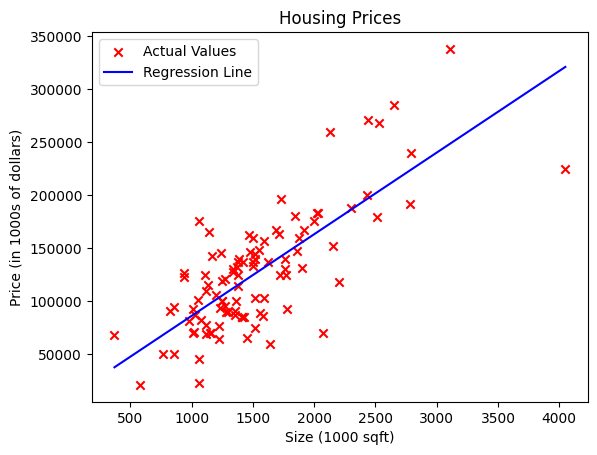

In [6]:

def data(x,y):
    x_mean=np.mean(x)
    y_mean=np.mean(y)
    b1_num=np.sum((x-x_mean)*(y-y_mean))
    b1_den=np.sum((x-x_mean)**2)
    b1=b1_num/b1_den
    b0=y_mean-(b1*x_mean)
    return b0,b1
b0, b1 = data(x_trai, y_trai)
x = np.linspace(min(x_trai), max(x_trai), 100)
y_pred=b0+(b1*x)
# scatter is used to marks the points
plt.scatter(x_trai, y_trai, marker='x', c='r',label='Actual Values')
plt.plot(x, y_pred, color='blue', label='Regression Line')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

Enter your house size:  1500


Price is 124672.69768599371


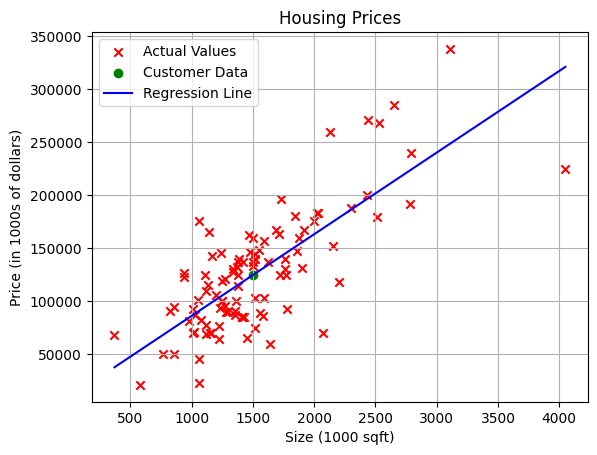

In [7]:
price=int(input("Enter your house size: "))
p=b0+(price*b1)
print(f"Price is {p}")
plt.scatter(x_trai, y_trai, marker='x', c='r',label='Actual Values')
plt.scatter(price,p,marker='o',c='g',label="Customer Data")
plt.plot(x, y_pred, color='blue', label='Regression Line')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.grid()
plt.legend()
plt.show()

x_train = np.array([
    1240, 370, 1130, 1120, 1710, 1010, 860, 1420, 1270, 1160
])
y_train = np.array([
    145000, 68000, 115000, 69000, 163000, 69900, 50000, 137000, 121300, 70000
])

In [136]:
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [198]:
def cost (x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        f=w*x[i]+b
        cost=cost+(f-y[i])**2
    total_cost=cost/(2*m)
    return total_cost

In [199]:
def descent(x,y,w,b):
    m = x.shape[0]
    dw=0
    db=0
    for i in range(m):
        f=w*x[i]+b
        dw+=(f-y[i])*x[i]
        db+=f-y[i]
    dwj=dw/m
    dbj=db/m
    return dwj,dbj

In [200]:
def gradient(x, y, a, max_iters):
    J_history=[]
    p_history=[]
    w, b = 0, 0 
    for i in range(max_iters):
        dwj, dwb = descent(x, y, w, b)
        temp_w = w - (a * dwj)
        temp_b = b - (a * dwb)
        w, b = temp_w, temp_b 
        if i < 100_000:  # prevent resource exhaustion  
            J_history.append(cost(x, y, w, b))  
            p_history.append([w, b]) 
            
        if i% math.ceil(max_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ", # 0.2e means till 2 decimal places
                  f"dwj: {dwj: 0.3e}, dwb: {dwb: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
       
    return w, b, J_history, p_history

In [204]:
a=0.0001  
m=100000
x_train = (x_trai - np.mean(x_trai)) / np.std(x_trai)
y_train = (y_trai - np.mean(y_trai)) / np.std(y_trai)
w,b,j,p = gradient(x_train ,y_train,a,m)
print(w,b)

Iteration    0: Cost 5.00e-01  dwj: -7.613e-01, dwb:  2.942e-17   w:  7.613e-05, b:-2.94209e-21
Iteration 10000: Cost 2.49e-01  dwj: -2.800e-01, dwb:  1.693e-17   w:  4.813e-01, b:-1.29197e-17
Iteration 20000: Cost 2.16e-01  dwj: -1.030e-01, dwb:  1.582e-17   w:  6.583e-01, b:-3.22221e-17
Iteration 30000: Cost 2.11e-01  dwj: -3.790e-02, dwb:  2.054e-17   w:  7.234e-01, b:-4.71588e-17
Iteration 40000: Cost 2.10e-01  dwj: -1.394e-02, dwb:  1.832e-17   w:  7.473e-01, b:-5.55122e-17
Iteration 50000: Cost 2.10e-01  dwj: -5.128e-03, dwb: -3.109e-17   w:  7.561e-01, b:-5.55082e-17
Iteration 60000: Cost 2.10e-01  dwj: -1.886e-03, dwb:  2.776e-17   w:  7.594e-01, b:-5.55114e-17
Iteration 70000: Cost 2.10e-01  dwj: -6.939e-04, dwb: -1.166e-17   w:  7.606e-01, b:-5.55120e-17
Iteration 80000: Cost 2.10e-01  dwj: -2.553e-04, dwb: -2.831e-17   w:  7.610e-01, b:-5.55102e-17
Iteration 90000: Cost 2.10e-01  dwj: -9.390e-05, dwb: -2.887e-17   w:  7.612e-01, b:-5.55109e-17
0.7612275676237403 -5.550979467

Enter house size 2500


House price is 201676.9877402968


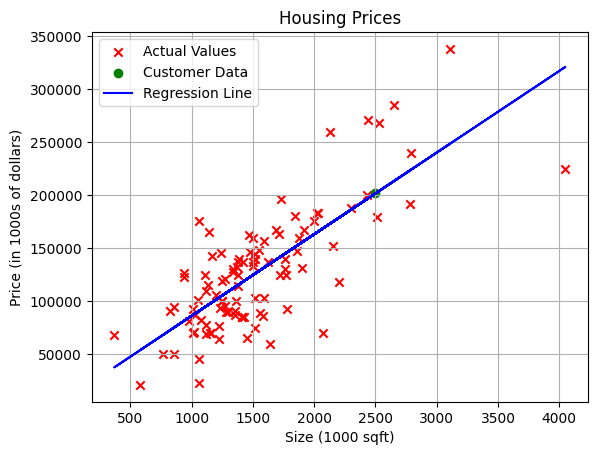

In [209]:
y_pred=(w*x_train)+b
y_pred_original_scale = y_pred * np.std(y_trai) + np.mean(y_trai)
size=int(input("Enter house size"))
size_scale=(size - np.mean(x_trai)) / np.std(x_trai)
price=(w*size_scale)+b
price_actual=price * np.std(y_trai) + np.mean(y_trai)
print("House price is",price_actual)
plt.scatter(x_trai, y_trai, marker='x', c='r',label='Actual Values')
plt.scatter(size,price_actual,marker='o',c='g',label="Customer Data")
plt.plot(x_trai, y_pred_original_scale, c='b', label="Regression Line")
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.grid()
plt.legend()
plt.show()

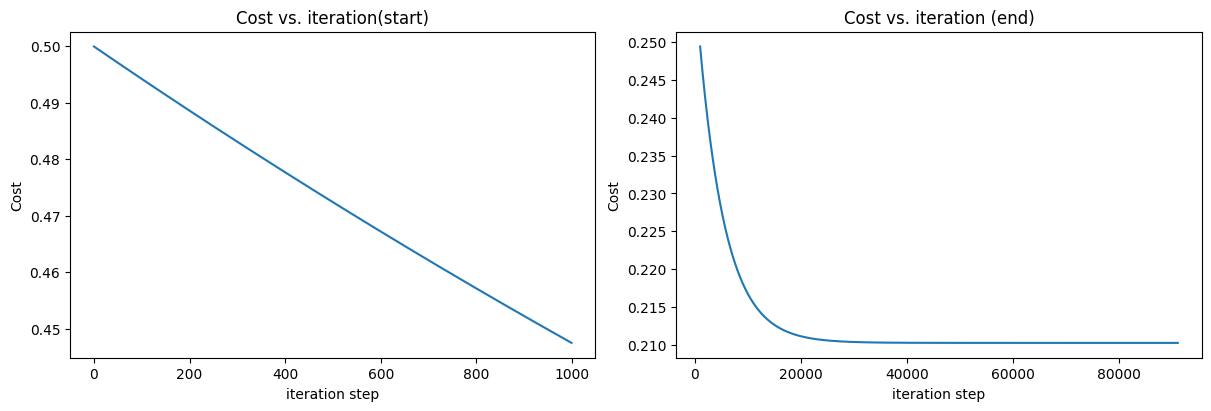

In [210]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j[:1000])
ax2.plot(1000 + np.arange(len(j[10000:])), j[10000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()